# Short theory background(refer to more regorous sources in case needed)

Comprehensive comparison of ARIMA, VAR, and LSTM models with their mathematical formulation, pros, cons, and evaluation metrics in a table format. I'll use LaTeX-style notation for the equations.

---

### **Model Comparison Table**

| **Model**   | **Mathematical Formulation**                                                                                                      | **Pros**                                                                                                        | **Cons**                                                                                                       |
|-------------|------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **ARIMA**   | $$ Y_t = c + \phi_1 Y_{t-1} + \dots + \phi_p Y_{t-p} + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t $$    | - Effective for univariate time series.<br>- Captures short-term trends and seasonality.<br>- Handles stationary data well. | - Requires data to be stationary (differencing may be needed).<br>- Does not handle multivariate data.<br>- Assumes linear relationships. |
| **VAR**     | $$ Y_t = c + A_1 Y_{t-1} + A_2 Y_{t-2} + \dots + A_p Y_{t-p} + \epsilon_t $$                                                       | - Models multiple variables simultaneously.<br>- Captures the interaction between time series.<br>- No need for differencing if already stationary. | - Computationally expensive with many variables.<br>- Requires a lot of data for reliable estimation.<br>- Sensitive to lag order selection. |
| **LSTM**    | $$ f_t = \sigma(W_f \cdot [h_{t-1}, X_t] + b_f) $$ <br> $$ i_t = \sigma(W_i \cdot [h_{t-1}, X_t] + b_i) $$ <br> $$ h_t = o_t \cdot \tanh(C_t) $$ | - Captures long-term dependencies.<br>- Handles both linear and non-linear relationships.<br>- Effective with large datasets. | - Requires large computational resources.<br>- Needs large datasets for optimal performance.<br>- Prone to overfitting on small datasets. |

---

### **Model Formulations**

1. **ARIMA (AutoRegressive Integrated Moving Average)**

   The ARIMA model is represented by:
   $$ Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t $$

   Where:
   - $ Y_t $ is the value at time $ t $.
   - $ \phi $ represents the autoregressive terms.
   - $ \theta $ represents the moving average terms.
   - $ \epsilon_t $ is white noise.
   - $ p $ is the order of the autoregressive part.
   - $ d $ is the number of differencing operations required to make the series stationary.
   - $ q $ is the order of the moving average part.

2. **VAR (Vector AutoRegression)**

   The VAR model is defined for multivariate time series data:
   $$ Y_t = c + A_1 Y_{t-1} + A_2 Y_{t-2} + \dots + A_p Y_{t-p} + \epsilon_t $$

   Where:
   - $ Y_t $ is a vector of variables at time $ t $.
   - $ A_p $ represents the coefficients for lag $ p $.
   - $ \epsilon_t $ is a vector of error terms.

3. **LSTM (Long Short-Term Memory)**

   The LSTM model includes gates to manage the flow of information:
   - **Forget gate**:
     $$ f_t = \sigma(W_f \cdot [h_{t-1}, X_t] + b_f) $$
   - **Input gate**:
     $$ i_t = \sigma(W_i \cdot [h_{t-1}, X_t] + b_i) $$
   - **Candidate cell state**:
     $$ \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, X_t] + b_C) $$
   - **New cell state**:
     $$ C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t $$
   - **Output gate**:
     $$ o_t = \sigma(W_o \cdot [h_{t-1}, X_t] + b_o) $$
   - **New hidden state**:
     $$ h_t = o_t \cdot \tanh(C_t) $$

   Where:
   - $ W $ and $ b $ are weights and biases.
   - $ \sigma $ is the sigmoid activation function.
   - $ \tanh $ is the tanh activation function.

---

### **Evaluation Metrics**

To evaluate these models, the following metrics are commonly used:

1. **MAE (Mean Absolute Error)**:
   $$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$
   - Measures the average magnitude of the errors.

2. **RMSE (Root Mean Squared Error)**:
   $$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$
   - Measures the square root of the average squared errors, emphasizing larger errors.

3. **MSE (Mean Squared Error)**:
   $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
   - Measures the average squared differences between actual and predicted values.

---

### **Pros and Cons Summary**

| **Model**       | **Pros**                                                                                                 | **Cons**                                                                                                    |
|-----------------|---------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| **ARIMA**       | - Works well with univariate time series.<br>- Handles trends and seasonality well after differencing.    | - Assumes linear relationships.<br>- Requires stationarity of the data.<br>- Doesn't model multivariate data.|
| **VAR**         | - Models multiple time series and their interactions.<br>- Useful for multivariate time series analysis.  | - High computational cost.<br>- Requires large datasets.<br>- Sensitive to lag selection.                    |
| **LSTM**        | - Captures long-term dependencies.<br>- Works with both linear and non-linear data.<br>- No need for stationarity. | - Requires large amounts of data and computational resources.<br>- Prone to overfitting with small data.     |

---

### **General Data Analytical Process**

1. **Data Collection**: Collect time series data (e.g., temperature, sales, stock prices).
2. **Data Preprocessing**:
   - Handle missing values.
   - Normalize or scale the data.
   - Check for stationarity (for ARIMA/VAR).
3. **Model Selection**: Choose between ARIMA, VAR, or LSTM depending on the data and the relationships you want to capture.
4. **Model Training**: Train the model on a training set.
5. **Model Evaluation**: Use metrics like MAE, RMSE, and MSE to evaluate the performance of the model.
6. **Forecasting**: Use the trained model to forecast future values.
7. **Model Tuning**: Adjust parameters like $ p, d, q $ in ARIMA, or lag in VAR, or LSTM hyperparameters.

---

This framework helps in deciding which model fits the data and problem context best.

#version 1 Arima

In [1]:
#@title 1. Setup & Data Retrieval
# Install meteostat and other dependencies
!pip install meteostat
!pip install statsmodels

# Import libraries
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Function to get data for a specific location
def get_weather_data(location, start, end):
    # Retrieve daily weather data for location
    data = Daily(location, start, end)
    data = data.fetch()
    return data

# Example: New York City (latitude, longitude, elevation)
location = Point(40.7128, -74.0060, 10)

# Define the time period
start = datetime(2020, 1, 1)
end = datetime.now() - timedelta(days=1)

# Get weather data
weather_data = get_weather_data(location, start, end)

# Print out data
print(weather_data.head())

# Check which weather traits are available
print(weather_data.columns)

# For the purpose of this example, we'll use 'tavg', 'prcp', 'wspd', 'pres'
# This data includes average temperature, precipitation, wind speed, and pressure


            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2020-01-01   3.6   1.7   5.0   0.0   0.0  264.0  17.3   NaN  1008.2   NaN
2020-01-02   4.7   0.6   8.9   0.0   0.0  218.0  12.4   NaN  1013.9   NaN
2020-01-03   7.6   6.7   8.3   2.8   0.0  257.0   8.4   NaN  1010.2   NaN
2020-01-04   8.2   6.7   9.4   5.3   0.0  325.0   5.7   NaN  1003.7   NaN
2020-01-05   4.6   2.8   7.2   0.0   0.0  300.0   8.2   NaN  1010.1   NaN
Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')


In [2]:
#@title 2. Preprocessing and Feature Selection
# Selecting relevant columns (temperature, precipitation, wind speed, and pressure)
features = weather_data[['tavg', 'prcp', 'wspd', 'pres']].dropna()

# Normalize data (optional but helpful for some models)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Split data into train and test sets (80% training, 20% testing)
train_size = int(len(scaled_features) * 0.8)
train, test = scaled_features[:train_size], scaled_features[train_size:]

# Print the shapes of the train and test sets
print(train.shape, test.shape)


(1372, 4) (344, 4)


In [3]:
#@title 3. Modeling with ARIMA
# Helper function to evaluate models and display metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae}, RMSE: {rmse}")
    return mae, rmse

# ARIMA for multi-step forecast
def forecast_with_arima(train, test, steps=7):
    predictions = []

    for i in range(test.shape[1]):  # Loop over each weather feature (temperature, etc.)
        # Train ARIMA for each feature (ARIMA(p=5, d=1, q=0) as an example)
        model = ARIMA(train[:, i], order=(5, 1, 0))
        model_fit = model.fit()

        # Forecast the next 'steps' (7 days)
        forecast = model_fit.forecast(steps=steps)
        predictions.append(forecast)

    # Combine the predictions for all features
    predictions = np.array(predictions).T
    return predictions

# Forecast for the next 7 days (test data)
predictions = forecast_with_arima(train, test, steps=7)

# Inverse transform to get the original scale
predictions_original_scale = scaler.inverse_transform(predictions)

# Evaluation (compare predicted and actual test data)
evaluate_model(test[:7], predictions_original_scale, model_name="ARIMA")


ARIMA - MAE: 265.2161981657148, RMSE: 510.8029881158047


(265.2161981657148, 510.8029881158047)

In [4]:
#@title 4. Interactive Fine-tuning with Widgets
# Install ipywidgets
!pip install ipywidgets

import ipywidgets as widgets
from IPython.display import display

# Create sliders for model tuning
order_p = widgets.IntSlider(value=5, min=1, max=10, description="AR Order")
order_d = widgets.IntSlider(value=1, min=0, max=2, description="Diff Order")
order_q = widgets.IntSlider(value=0, min=0, max=5, description="MA Order")
forecast_steps = widgets.IntSlider(value=7, min=1, max=14, description="Forecast Days")
retrain_button = widgets.Button(description="Retrain Model")

# Output area to display results
output = widgets.Output()

# Function to retrain and forecast with new parameters
def retrain_model(event):
    with output:
        output.clear_output()

        # Retrain ARIMA with user-selected parameters
        p, d, q = order_p.value, order_d.value, order_q.value
        steps = forecast_steps.value

        predictions = []
        for i in range(train.shape[1]):
            model = ARIMA(train[:, i], order=(p, d, q))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=steps)
            predictions.append(forecast)

        predictions = np.array(predictions).T
        predictions_original_scale = scaler.inverse_transform(predictions)

        # Evaluate and display results
        mae, rmse = evaluate_model(test[:steps], predictions_original_scale, model_name=f"ARIMA(p={p}, d={d}, q={q})")
        print(f"MAE: {mae}, RMSE: {rmse}")

# Connect button click to retraining logic
retrain_button.on_click(retrain_model)

# Display the widgets and results
display(order_p, order_d, order_q, forecast_steps, retrain_button, output)


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


IntSlider(value=5, description='AR Order', max=10, min=1)

IntSlider(value=1, description='Diff Order', max=2)

IntSlider(value=0, description='MA Order', max=5)

IntSlider(value=7, description='Forecast Days', max=14, min=1)

Button(description='Retrain Model', style=ButtonStyle())

Output()

#version 2 Arima

In [6]:
#@title 1. Data Collection and Preprocessing (Unchanged)
# Install meteostat and other dependencies
!pip install meteostat
!pip install statsmodels

# Import libraries
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Function to get data for a specific location
def get_weather_data(location, start, end):
    # Retrieve daily weather data for location
    data = Daily(location, start, end)
    data = data.fetch()
    return data

# Example: New York City (latitude, longitude, elevation)
location = Point(40.7128, -74.0060, 10)

# Define the time period
start = datetime(2020, 1, 1)
end = datetime.now() - timedelta(days=1)

# Get weather data
weather_data = get_weather_data(location, start, end)

# Selecting relevant columns (temperature, precipitation, wind speed, and pressure)
features = weather_data[['tavg', 'prcp', 'wspd', 'pres']].dropna()

# Normalize data (optional but helpful for some models)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Split data into train and test sets (80% training, 20% testing)
train_size = int(len(scaled_features) * 0.8)
train, test = scaled_features[:train_size], scaled_features[train_size:]

# Print the shapes of the train and test sets
print(train.shape, test.shape)

(1372, 4) (344, 4)


In [7]:
#@title 2. ARIMA Forecast with History Tracking

# Store the history of previous predictions
predictions_history = []

# Helper function to evaluate models and display metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae}, RMSE: {rmse}")
    return mae, rmse

# ARIMA for multi-step forecast
def forecast_with_arima(train, test, steps=7, p=5, d=1, q=0):
    predictions = []

    for i in range(test.shape[1]):  # Loop over each weather feature (temperature, etc.)
        model = ARIMA(train[:, i], order=(p, d, q))
        model_fit = model.fit()

        # Forecast the next 'steps' (7 days)
        forecast = model_fit.forecast(steps=steps)
        predictions.append(forecast)

    # Combine the predictions for all features
    predictions = np.array(predictions).T
    return predictions

In [8]:
#@title 3. Widgets for Interactive Tuning and Historical Results
# Install ipywidgets
!pip install ipywidgets

import ipywidgets as widgets
from IPython.display import display

# Create sliders for model tuning
order_p = widgets.IntSlider(value=5, min=1, max=10, description="AR Order")
order_d = widgets.IntSlider(value=1, min=0, max=2, description="Diff Order")
order_q = widgets.IntSlider(value=0, min=0, max=5, description="MA Order")
forecast_steps = widgets.IntSlider(value=7, min=1, max=14, description="Forecast Days")
retrain_button = widgets.Button(description="Retrain Model")

# Output area to display results
output = widgets.Output()

# Plotting function for side-by-side actual vs predicted
def plot_actual_vs_predicted(actual, predicted, feature_names):
    steps = len(predicted)
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.flatten()

    for i, feature in enumerate(feature_names):
        axs[i].plot(range(steps), actual[:steps, i], label='Actual', color='blue')
        axs[i].plot(range(steps), predicted[:, i], label='Predicted', color='red')
        axs[i].set_title(f'{feature} (Actual vs Predicted)')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Function to retrain and forecast with new parameters
def retrain_model(event):
    with output:
        output.clear_output()

        # Retrain ARIMA with user-selected parameters
        p, d, q = order_p.value, order_d.value, order_q.value
        steps = forecast_steps.value

        # Get predictions
        predictions = forecast_with_arima(train, test, steps=steps, p=p, d=d, q=q)

        # Inverse transform to get the original scale
        predictions_original_scale = scaler.inverse_transform(predictions)
        actual_original_scale = scaler.inverse_transform(test[:steps])

        # Append to history
        predictions_history.append({
            'p': p,
            'd': d,
            'q': q,
            'steps': steps,
            'predictions': predictions_original_scale
        })

        # Evaluate and display metrics for the current run
        mae, rmse = evaluate_model(actual_original_scale, predictions_original_scale, model_name=f"ARIMA(p={p}, d={d}, q={q})")

        # Plot all previous runs including the current one
        for idx, record in enumerate(predictions_history):
            print(f"Run {idx+1}: ARIMA(p={record['p']}, d={record['d']}, q={record['q']}) with {record['steps']} steps")
            plot_actual_vs_predicted(actual_original_scale, record['predictions'], feature_names=features.columns)

# Connect button click to retraining logic
retrain_button.on_click(retrain_model)

# Display the widgets and results
display(order_p, order_d, order_q, forecast_steps, retrain_button, output)

IntSlider(value=5, description='AR Order', max=10, min=1)

IntSlider(value=1, description='Diff Order', max=2)

IntSlider(value=0, description='MA Order', max=5)

IntSlider(value=7, description='Forecast Days', max=14, min=1)

Button(description='Retrain Model', style=ButtonStyle())

Output()

#version 3 Arima

In [ ]:
#@title dependencies
# Install necessary libraries
!pip install meteostat
!pip install statsmodels
!pip install ipywidgets

In [56]:
#@title main ARIMA
# Import necessary libraries
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to get data for a specific location
def get_weather_data(location, start, end):
    # Retrieve daily weather data for location
    data = Daily(location, start, end)
    data = data.fetch()
    return data

# Example: New York City (latitude, longitude, elevation)
location = Point(40.7128, -74.0060, 10)

# Date range selector for training data
date_picker_start = widgets.DatePicker(
    description='Start Date',
    value=datetime(2020, 1, 1),
    disabled=False
)

date_picker_end = widgets.DatePicker(
    description='End Date',
    value=datetime.now().date(),
    disabled=False
)

# Create sliders for ARIMA model tuning
order_p = widgets.IntSlider(value=5, min=1, max=10, description="AR Order")
order_d = widgets.IntSlider(value=1, min=0, max=2, description="Diff Order")
order_q = widgets.IntSlider(value=0, min=0, max=5, description="MA Order")
forecast_steps = widgets.IntSlider(value=7, min=1, max=14, description="Forecast Days")
retrain_button = widgets.Button(description="Retrain Model")

# Progress bar to track completion rate
progress_bar = widgets.IntProgress(value=0, min=0, max=100, description='Progress', bar_style='info')

# Output area to display results
output = widgets.Output()

# Store metrics of each run (MAE and RMSE)
metrics_history = []

# Function to fetch and preprocess data based on selected date range
def update_data():
    global weather_data, train, test, scaler, train_dates, test_dates
    start = date_picker_start.value
    end = date_picker_end.value
    weather_data = get_weather_data(location, datetime.combine(start, datetime.min.time()), datetime.combine(end, datetime.min.time()))

    # Selecting relevant columns (temperature, precipitation, wind speed, and pressure)
    features = weather_data[['tavg', 'prcp', 'wspd', 'pres']].dropna()

    # Normalize data (optional but helpful for some models)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)

    # Split data into train and test sets (80% training, 20% testing)
    train_size = int(len(scaled_features) * 0.8)
    train, test = scaled_features[:train_size], scaled_features[train_size:]

    # Track the dates for train and test sets
    train_dates = weather_data.index[:train_size]
    test_dates = weather_data.index[train_size:]

    return features.columns

# Fetch the data initially
columns = update_data()

# ARIMA for multi-step forecast
def forecast_with_arima(train, test, steps=7, p=5, d=1, q=0):
    predictions = []

    for i in range(test.shape[1]):  # Loop over each weather feature (temperature, etc.)
        model = ARIMA(train[:, i], order=(p, d, q))
        model_fit = model.fit()

        # Forecast the next 'steps' (7 days)
        forecast = model_fit.forecast(steps=steps)
        predictions.append(forecast)

    # Combine the predictions for all features
    predictions = np.array(predictions).T
    return predictions

# Helper function to evaluate models and display metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Function to initialize or update the Matplotlib graph
def update_matplotlib_graph(actual, predicted, feature_names, p, d, q, steps, start_date, end_date):
    global fig, ax

    # Close the previous figure to avoid multiple empty figures
    plt.close(fig)

    # Create new figure and axes (1x4 grid for 4 features)
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    steps_len = len(predicted)

    # Plot actual vs. predicted for each feature
    for i, feature in enumerate(feature_names):
        ax[i].plot(test_dates[-steps_len:], actual[:steps_len, i], label=f'Actual {feature}', linestyle='--', marker='o', color='blue')
        ax[i].plot(test_dates[-steps_len:], predicted[:, i], label=f'Predicted {feature} (p={p}, d={d}, q={q})', linestyle='-', marker='x', color='red')
        ax[i].set_title(f"{feature}")
        ax[i].set_xlabel("Date")
        ax[i].set_ylabel("Values")
        ax[i].legend()

    plt.tight_layout()
    plt.show()

# Function to plot the bar chart of metrics after each run
def plot_metrics_bar_chart(metrics_history):
    runs = list(range(1, len(metrics_history) + 1))
    mae_values = [m['MAE'] for m in metrics_history]
    rmse_values = [m['RMSE'] for m in metrics_history]

    # Create bar chart for MAE and RMSE
    fig, ax = plt.subplots(figsize=(10, 5))

    bar_width = 0.35
    index = np.arange(len(runs))

    bar1 = ax.bar(index, mae_values, bar_width, label='MAE', color='blue')
    bar2 = ax.bar(index + bar_width, rmse_values, bar_width, label='RMSE', color='green')

    ax.set_xlabel('Run Number')
    ax.set_ylabel('Metrics')
    ax.set_title('MAE and RMSE Comparison Across Runs')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([f'Run {i}' for i in runs])
    ax.legend()

    plt.show()

# Function to retrain and forecast with new parameters
def retrain_model(event):
    global overlay_counter  # Use the global variable here
    with output:
        # Retain previous output by not clearing
        progress_bar.value = 0  # Reset progress bar

        # Update data based on selected date range
        feature_names = update_data()

        # Retrain ARIMA with user-selected parameters
        p, d, q = order_p.value, order_d.value, order_q.value
        steps = forecast_steps.value
        start_date = date_picker_start.value
        end_date = date_picker_end.value

        # Get predictions
        progress_bar.value = 30  # 30% progress
        predictions = forecast_with_arima(train, test, steps=steps, p=p, d=d, q=q)
        progress_bar.value = 60  # 60% progress

        # Inverse transform to get the original scale
        predictions_original_scale = scaler.inverse_transform(predictions)
        actual_original_scale = scaler.inverse_transform(test[-steps:])

        # Evaluate and display metrics for the current run
        mae, rmse = evaluate_model(actual_original_scale, predictions_original_scale, model_name=f"ARIMA(p={p}, d={d}, q={q})")
        metrics_history.append({'MAE': mae, 'RMSE': rmse, 'p': p, 'd': d, 'q': q})

        progress_bar.value = 80  # 80% progress

        # Display the chosen parameters, date range, and model metrics
        print(f"Training Period: {start_date} to {end_date}")
        print(f"ARIMA Parameters: p={p}, d={d}, q={q}")
        print(f"Forecast Steps: {steps}")
        print(f"MAE: {mae}, RMSE: {rmse}")

        # Update the plot with new data or create a new plot if necessary
        update_matplotlib_graph(actual_original_scale, predictions_original_scale, feature_names, p, d, q, steps, start_date, end_date)

        # Plot bar chart comparing MAE and RMSE across runs
        plot_metrics_bar_chart(metrics_history)

        # Set progress bar to 100% when complete
        progress_bar.value = 100

# Connect button click to retraining logic
retrain_button.on_click(retrain_model)

# Display the widgets and results
display(date_picker_start, date_picker_end, order_p, order_d, order_q, forecast_steps, retrain_button, progress_bar, output)


DatePicker(value=datetime.datetime(2020, 1, 1, 0, 0), description='Start Date')

DatePicker(value=datetime.date(2024, 9, 12), description='End Date')

IntSlider(value=5, description='AR Order', max=10, min=1)

IntSlider(value=1, description='Diff Order', max=2)

IntSlider(value=0, description='MA Order', max=5)

IntSlider(value=7, description='Forecast Days', max=14, min=1)

Button(description='Retrain Model', style=ButtonStyle())

IntProgress(value=0, bar_style='info', description='Progress')

Output()

# Vector Autoregression (VAR)

In [58]:
#@title main VAR
# Import necessary libraries
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from meteostat import Point, Daily
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to get data for a specific location
def get_weather_data(location, start, end):
    # Retrieve daily weather data for location
    data = Daily(location, start, end)
    data = data.fetch()
    return data

# Example: New York City (latitude, longitude, elevation)
location = Point(40.7128, -74.0060, 10)

# Date range selector for training data
date_picker_start = widgets.DatePicker(
    description='Start Date',
    value=datetime(2020, 1, 1),
    disabled=False
)

date_picker_end = widgets.DatePicker(
    description='End Date',
    value=datetime.now().date(),
    disabled=False
)

# Create slider for VAR model's lag order
lag_order_slider = widgets.IntSlider(value=5, min=1, max=10, description="Lag Order")
forecast_steps = widgets.IntSlider(value=7, min=1, max=14, description="Forecast Days")
retrain_button = widgets.Button(description="Retrain Model")

# Progress bar to track completion rate
progress_bar = widgets.IntProgress(value=0, min=0, max=100, description='Progress', bar_style='info')

# Output area to display results
output = widgets.Output()

# Store metrics of each run (MAE and RMSE)
metrics_history = []

# Function to fetch and preprocess data based on selected date range
def update_data():
    global weather_data, train, test, scaler, train_dates, test_dates
    start = date_picker_start.value
    end = date_picker_end.value
    weather_data = get_weather_data(location, datetime.combine(start, datetime.min.time()), datetime.combine(end, datetime.min.time()))

    # Selecting relevant columns (temperature, precipitation, wind speed, and pressure)
    features = weather_data[['tavg', 'prcp', 'wspd', 'pres']].dropna()

    # Normalize data (optional but helpful for some models)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)

    # Split data into train and test sets (80% training, 20% testing)
    train_size = int(len(scaled_features) * 0.8)
    train, test = scaled_features[:train_size], scaled_features[train_size:]

    # Track the dates for train and test sets
    train_dates = weather_data.index[:train_size]
    test_dates = weather_data.index[train_size:]

    return features.columns

# Fetch the data initially
columns = update_data()

# VAR for multi-step forecast
def forecast_with_var(train, steps=7, lag_order=5):
    model = VAR(train)
    model_fitted = model.fit(lag_order)

    # Forecast the next 'steps' (e.g., 7 days)
    forecast = model_fitted.forecast(train[-lag_order:], steps=steps)

    return forecast

# Helper function to evaluate models and display metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Function to initialize or update the Matplotlib graph
def update_matplotlib_graph(actual, predicted, feature_names, lag_order, steps, start_date, end_date):
    global fig, ax

    # Close the previous figure to avoid multiple empty figures
    plt.close(fig)

    # Create new figure and axes (1x4 grid for 4 features)
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    steps_len = len(predicted)

    # Plot actual vs. predicted for each feature
    for i, feature in enumerate(feature_names):
        ax[i].plot(test_dates[-steps_len:], actual[:steps_len, i], label=f'Actual {feature}', linestyle='--', marker='o', color='blue')
        ax[i].plot(test_dates[-steps_len:], predicted[:, i], label=f'Predicted {feature} (Lag={lag_order})', linestyle='-', marker='x', color='red')
        ax[i].set_title(f"{feature}")
        ax[i].set_xlabel("Date")
        ax[i].set_ylabel("Values")
        ax[i].legend()

        # Rotate x-axis dates for better readability
        ax[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Function to plot the bar chart of metrics after each run
def plot_metrics_bar_chart(metrics_history):
    runs = list(range(1, len(metrics_history) + 1))
    mae_values = [m['MAE'] for m in metrics_history]
    rmse_values = [m['RMSE'] for m in metrics_history]

    # Create bar chart for MAE and RMSE
    fig, ax = plt.subplots(figsize=(10, 5))

    bar_width = 0.35
    index = np.arange(len(runs))

    bar1 = ax.bar(index, mae_values, bar_width, label='MAE', color='blue')
    bar2 = ax.bar(index + bar_width, rmse_values, bar_width, label='RMSE', color='green')

    ax.set_xlabel('Run Number')
    ax.set_ylabel('Metrics')
    ax.set_title('MAE and RMSE Comparison Across Runs')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([f'Run {i}' for i in runs])
    ax.legend()

    plt.show()

# Function to retrain and forecast with new parameters
def retrain_model(event):
    global overlay_counter  # Use the global variable here
    with output:
        # Retain previous output by not clearing
        progress_bar.value = 0  # Reset progress bar

        # Update data based on selected date range
        feature_names = update_data()

        # Retrain VAR with user-selected lag order
        lag_order = lag_order_slider.value
        steps = forecast_steps.value
        start_date = date_picker_start.value
        end_date = date_picker_end.value

        # Get predictions
        progress_bar.value = 30  # 30% progress
        predictions = forecast_with_var(train, steps=steps, lag_order=lag_order)
        progress_bar.value = 60  # 60% progress

        # Inverse transform to get the original scale
        predictions_original_scale = scaler.inverse_transform(predictions)
        actual_original_scale = scaler.inverse_transform(test[-steps:])

        # Evaluate and display metrics for the current run
        mae, rmse = evaluate_model(actual_original_scale, predictions_original_scale, model_name=f"VAR(lag={lag_order})")
        metrics_history.append({'MAE': mae, 'RMSE': rmse, 'Lag Order': lag_order, 'Forecast Steps': steps})

        progress_bar.value = 80  # 80% progress

        # Display the chosen parameters, date range, and model metrics
        print(f"Training Period: {start_date} to {end_date}")
        print(f"VAR Model Lag Order: {lag_order}")
        print(f"Forecast Steps: {steps}")
        print(f"MAE: {mae}, RMSE: {rmse}")

        # Update the plot with new data or create a new plot if necessary
        update_matplotlib_graph(actual_original_scale, predictions_original_scale, feature_names, lag_order, steps, start_date, end_date)

        # Plot bar chart comparing MAE and RMSE across runs
        plot_metrics_bar_chart(metrics_history)

        # Set progress bar to 100% when complete
        progress_bar.value = 100

# Connect button click to retraining logic
retrain_button.on_click(retrain_model)

# Display the widgets and results
display(date_picker_start, date_picker_end, lag_order_slider, forecast_steps, retrain_button, progress_bar, output)


DatePicker(value=datetime.datetime(2020, 1, 1, 0, 0), description='Start Date')

DatePicker(value=datetime.date(2024, 9, 12), description='End Date')

IntSlider(value=5, description='Lag Order', max=10, min=1)

IntSlider(value=7, description='Forecast Days', max=14, min=1)

Button(description='Retrain Model', style=ButtonStyle())

IntProgress(value=0, bar_style='info', description='Progress')

Output()

# LSTM (Long Short-Term Memory)

In [59]:
#@title main LSTM
# Import necessary libraries
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from meteostat import Point, Daily
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to get data for a specific location
def get_weather_data(location, start, end):
    # Retrieve daily weather data for location
    data = Daily(location, start, end)
    data = data.fetch()
    return data

# Example: New York City (latitude, longitude, elevation)
location = Point(40.7128, -74.0060, 10)

# Date range selector for training data
date_picker_start = widgets.DatePicker(
    description='Start Date',
    value=datetime(2020, 1, 1),
    disabled=False
)

date_picker_end = widgets.DatePicker(
    description='End Date',
    value=datetime.now().date(),
    disabled=False
)

# Create slider for LSTM window size (how many past time steps to use) and forecast steps
window_size_slider = widgets.IntSlider(value=5, min=1, max=30, description="Window Size")
forecast_steps = widgets.IntSlider(value=7, min=1, max=14, description="Forecast Days")
retrain_button = widgets.Button(description="Retrain Model")

# Progress bar to track completion rate
progress_bar = widgets.IntProgress(value=0, min=0, max=100, description='Progress', bar_style='info')

# Output area to display results
output = widgets.Output()

# Store metrics of each run (MAE and RMSE)
metrics_history = []

# Function to fetch and preprocess data based on selected date range
def update_data():
    global weather_data, train, test, scaler, train_dates, test_dates
    start = date_picker_start.value
    end = date_picker_end.value
    weather_data = get_weather_data(location, datetime.combine(start, datetime.min.time()), datetime.combine(end, datetime.min.time()))

    # Selecting relevant columns (temperature, precipitation, wind speed, and pressure)
    features = weather_data[['tavg', 'prcp', 'wspd', 'pres']].dropna()

    # Normalize data (optional but helpful for neural networks)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)

    # We now train on all data except the last `forecast_steps` days
    train_size = len(scaled_features) - forecast_steps.value
    train, test = scaled_features[:train_size], scaled_features[train_size:]

    # Track the dates for train and test sets
    train_dates = weather_data.index[:train_size]
    test_dates = weather_data.index[train_size:]

    return features.columns

# Fetch the data initially
columns = update_data()

# Prepare data for LSTM: create sequences of past observations (sliding window approach)
def create_lstm_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# LSTM model for multi-step forecast using Input layer
def forecast_with_lstm(train, window_size, steps):
    # Prepare data for LSTM
    X_train, y_train = create_lstm_data(train, window_size)

    # Reshape input to be 3D [samples, timesteps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], train.shape[1]))

    # Build LSTM model using Input layer
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
    x = LSTM(100, activation='relu')(inputs)
    outputs = Dense(train.shape[1])(x)

    # Create and compile the model
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Generate predictions for the test set (last `n` days)
    input_seq = train[-window_size:]  # Last window to predict from
    predictions = []

    for _ in range(steps):
        input_seq = input_seq.reshape((1, window_size, train.shape[1]))
        pred = model.predict(input_seq, verbose=0)[0]
        predictions.append(pred)

        # Update the input sequence: Remove the first element and append the prediction
        input_seq = np.vstack([input_seq[0][1:], pred])  # Make sure input_seq is 2D

    predictions = np.array(predictions)
    return predictions

# Helper function to evaluate models and display metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Function to initialize or update the Matplotlib graph
def update_matplotlib_graph(actual, predicted, pred_dates, feature_names, window_size, steps, start_date, end_date):
    global fig, ax

    # Close the previous figure to avoid multiple empty figures
    plt.close(fig)

    # Create new figure and axes (1x4 grid for 4 features)
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    steps_len = len(predicted)

    # Plot actual vs. predicted for each feature
    for i, feature in enumerate(feature_names):
        ax[i].plot(pred_dates, actual[:steps_len, i], label=f'Actual {feature}', linestyle='--', marker='o', color='blue')
        ax[i].plot(pred_dates, predicted[:, i], label=f'Predicted {feature} (Window={window_size})', linestyle='-', marker='x', color='red')
        ax[i].set_title(f"{feature}")
        ax[i].set_xlabel("Date")
        ax[i].set_ylabel("Values")
        ax[i].legend()

        # Rotate x-axis dates for better readability
        ax[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Function to plot the bar chart of metrics after each run
def plot_metrics_bar_chart(metrics_history):
    runs = list(range(1, len(metrics_history) + 1))
    mae_values = [m['MAE'] for m in metrics_history]
    rmse_values = [m['RMSE'] for m in metrics_history]

    # Create bar chart for MAE and RMSE
    fig, ax = plt.subplots(figsize=(10, 5))

    bar_width = 0.35
    index = np.arange(len(runs))

    bar1 = ax.bar(index, mae_values, bar_width, label='MAE', color='blue')
    bar2 = ax.bar(index + bar_width, rmse_values, bar_width, label='RMSE', color='green')

    ax.set_xlabel('Run Number')
    ax.set_ylabel('Metrics')
    ax.set_title('MAE and RMSE Comparison Across Runs')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([f'Run {i}' for i in runs])
    ax.legend()

    plt.show()

# Function to retrain and forecast with new parameters
def retrain_model(event):
    with output:
        # Keep previous output by not clearing the output
        progress_bar.value = 0  # Reset progress bar

        # Update data based on selected date range
        feature_names = update_data()

        # Retrain LSTM with user-selected window size
        window_size = window_size_slider.value
        steps = forecast_steps.value
        start_date = date_picker_start.value
        end_date = date_picker_end.value

        # Get predictions
        progress_bar.value = 30  # 30% progress
        predictions = forecast_with_lstm(train, window_size=window_size, steps=steps)
        progress_bar.value = 60  # 60% progress

        # Inverse transform to get the original scale
        predictions_original_scale = scaler.inverse_transform(predictions)
        actual_original_scale = scaler.inverse_transform(test[:steps])
        pred_dates = test_dates[:steps]

        # Evaluate and display metrics for the current run
        mae, rmse = evaluate_model(actual_original_scale, predictions_original_scale, model_name=f"LSTM(window_size={window_size})")
        progress_bar.value = 80  # 80% progress

        # Store metrics of the current run
        metrics_history.append({'MAE': mae, 'RMSE': rmse, 'Window Size': window_size, 'Forecast Steps': steps})

        # Display the chosen parameters, date range, and model metrics
        print(f"Training Period: {start_date} to {end_date}")
        print(f"LSTM Window Size: {window_size}")
        print(f"Forecast Steps: {steps}")
        print(f"MAE: {mae}, RMSE: {rmse}")

        # Update the plot with new data or create a new plot if necessary
        update_matplotlib_graph(actual_original_scale, predictions_original_scale, pred_dates, feature_names, window_size, steps, start_date, end_date)

        # Plot bar chart comparing MAE and RMSE across runs
        plot_metrics_bar_chart(metrics_history)

        # Set progress bar to 100% when complete
        progress_bar.value = 100

# Connect button click to retraining logic
retrain_button.on_click(retrain_model)

# Display the widgets and results
display(date_picker_start, date_picker_end, window_size_slider, forecast_steps, retrain_button, progress_bar, output)


DatePicker(value=datetime.datetime(2020, 1, 1, 0, 0), description='Start Date')

DatePicker(value=datetime.date(2024, 9, 12), description='End Date')

IntSlider(value=5, description='Window Size', max=30, min=1)

IntSlider(value=7, description='Forecast Days', max=14, min=1)

Button(description='Retrain Model', style=ButtonStyle())

IntProgress(value=0, bar_style='info', description='Progress')

Output()

In [42]:
weather_data

tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2021-01-01   3.6   2.2   4.4  17.3   0.0   36.0  13.2   NaN  1029.4   NaN
2021-01-02   6.3   3.3  12.2   6.1   0.0  319.0  11.6   NaN  1012.9   NaN
2021-01-03   3.4   2.8   4.4   5.7   0.0   33.0  22.4   NaN  1017.1   NaN
2021-01-04   4.6   2.8   7.2   0.7   0.0    7.0   8.1   NaN  1015.0   NaN
2021-01-05   4.4   3.3   5.6   0.0   0.0    0.0   8.1   NaN  1013.5   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2024-09-07  20.5  17.0  24.0   8.4   NaN  183.0   9.2   NaN  1011.6   NaN
2024-09-08  18.4  13.9  23.0   0.0   NaN  285.0  11.4   NaN  1015.9   NaN
2024-09-09  20.3  14.4  26.0   0.0   NaN  261.0  11.5   NaN  1018.9   NaN
2024-09-10  21.6  17.3  26.7   0.0   NaN  311.0   9.0   NaN  1018.6   NaN
2024-09-11  19.0  12.5  25.7   0.0   NaN   71.0  12.4   NaN  1021.9   NaN

[1350 rows x 10 columns]

#Another perspective

Dropdown(description='Variable:', options=('tavg', 'prcp', 'wspd', 'pres'), value='tavg')

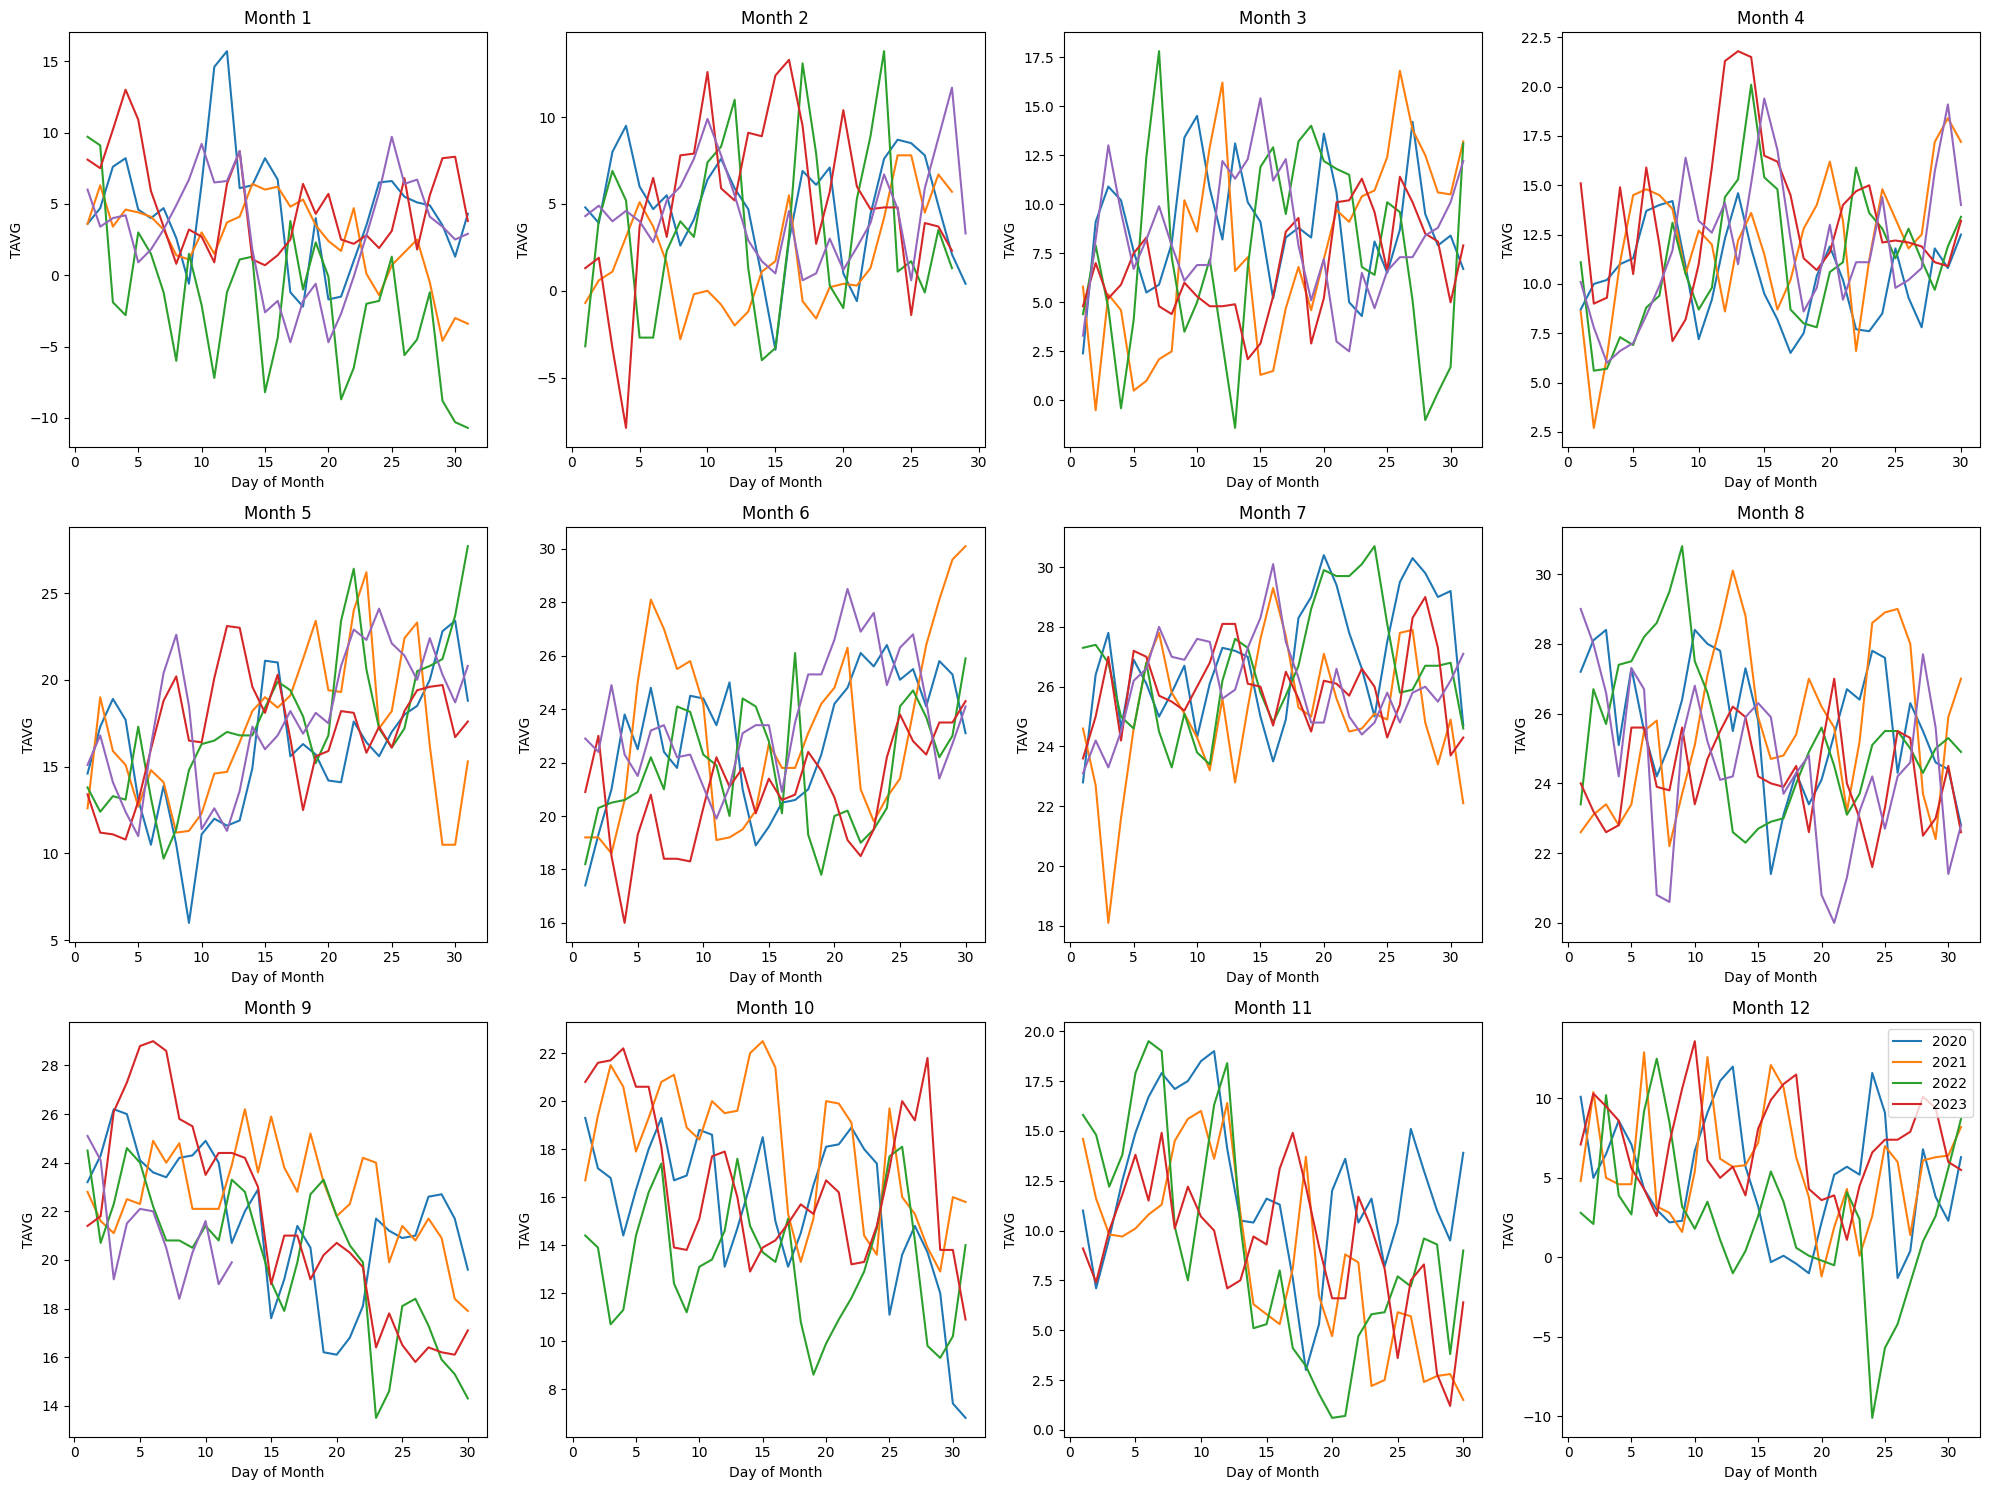

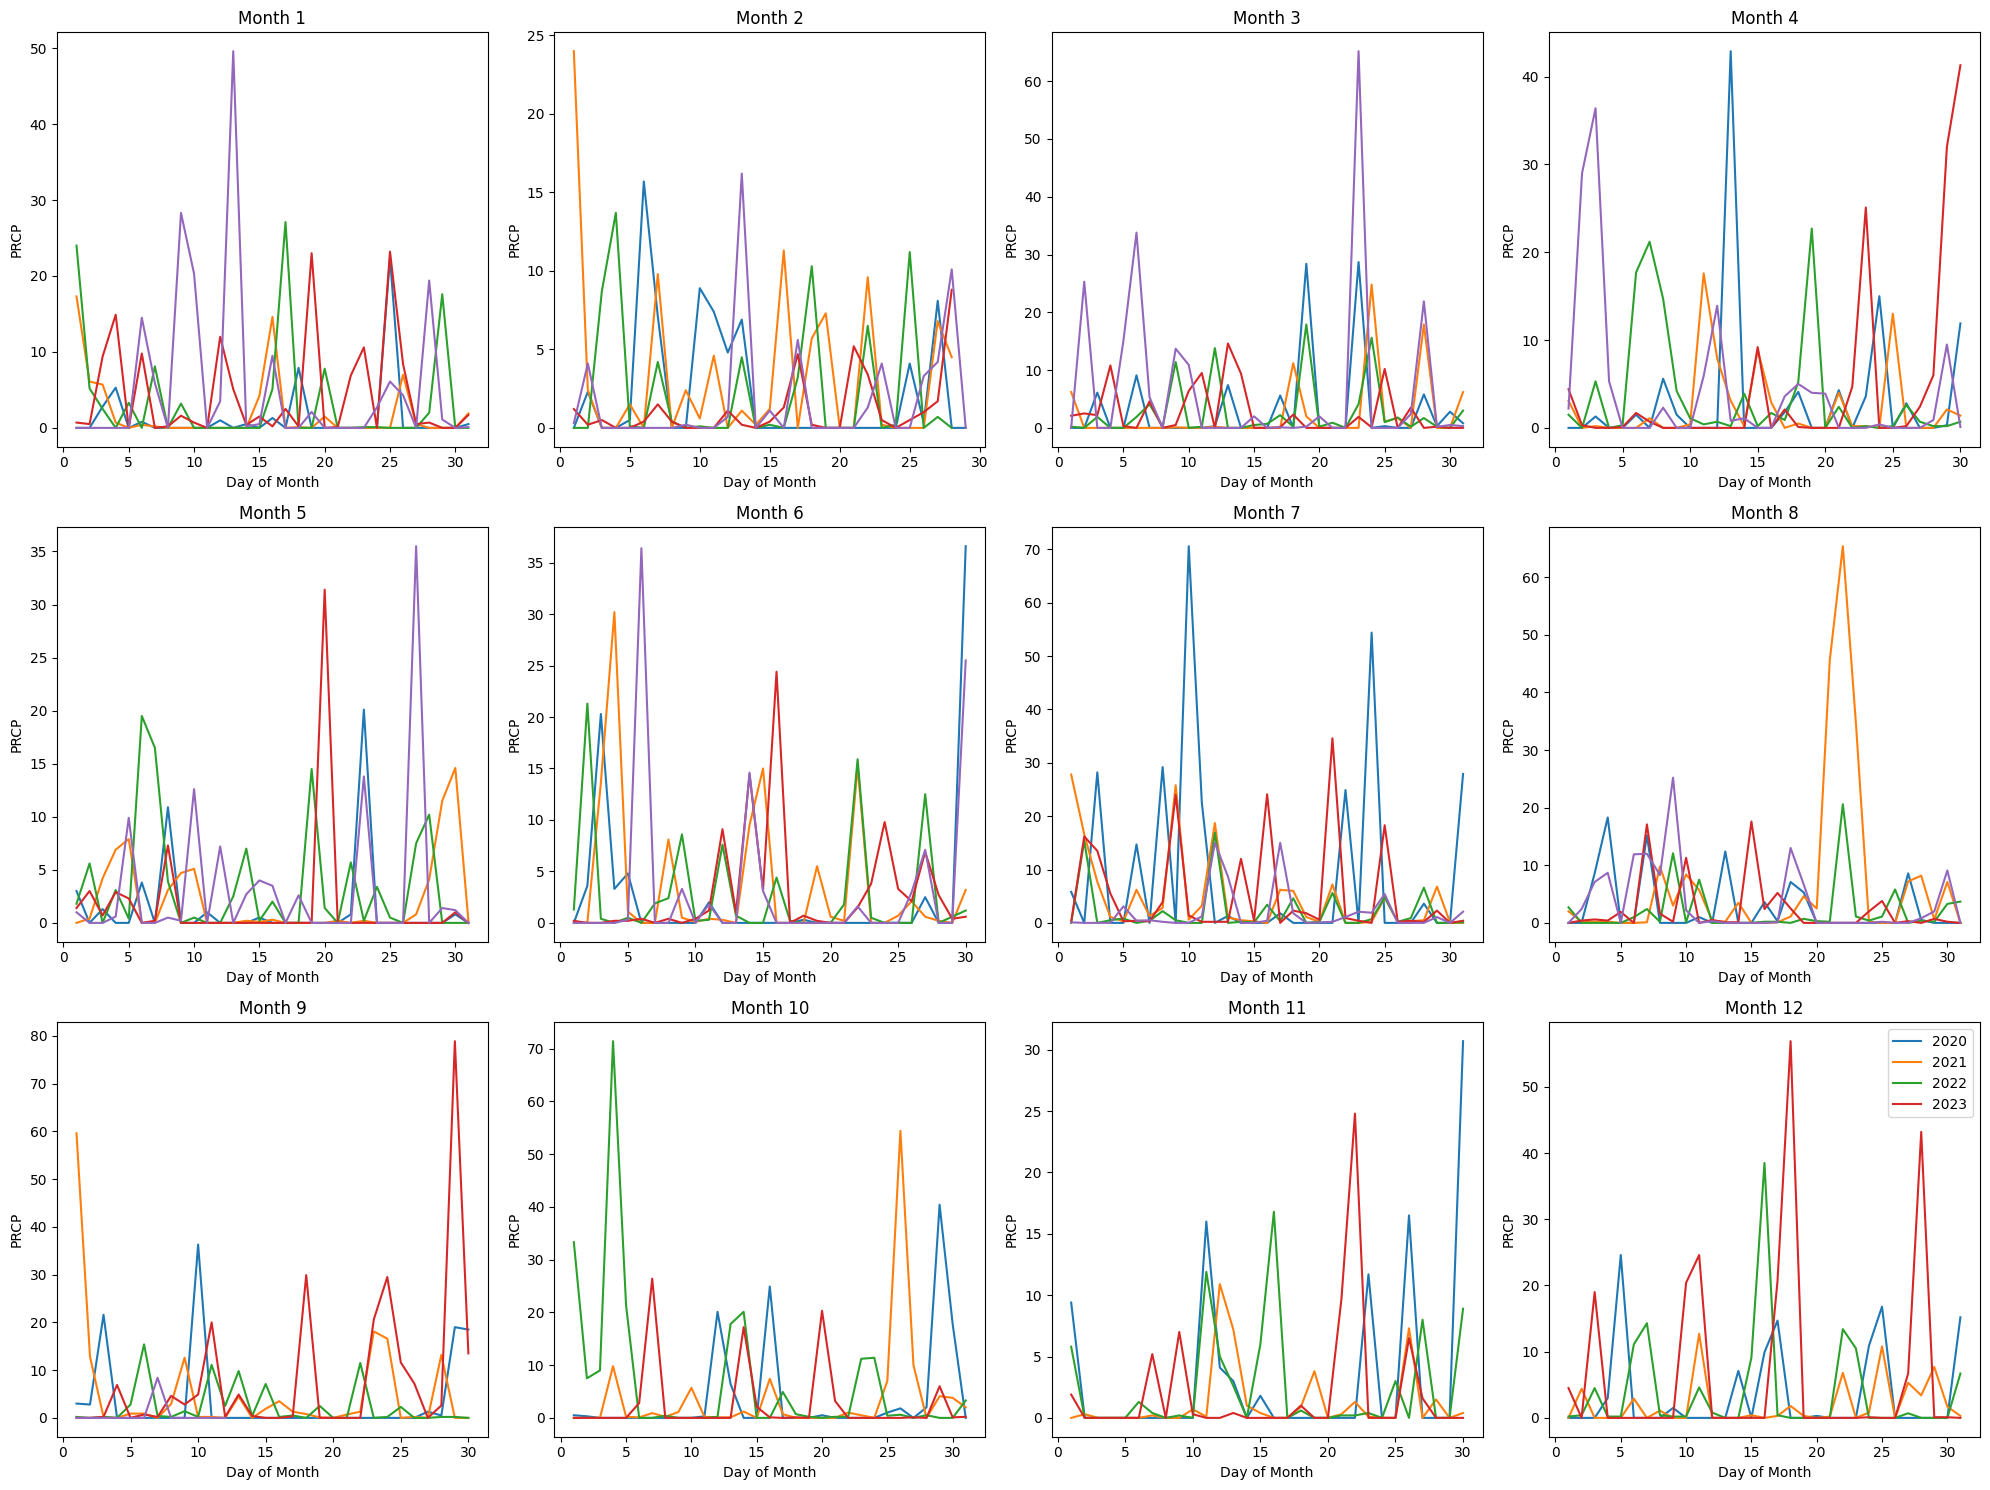

In [62]:
#@title version 1
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display

# Function to get weather data for a specific location and time range
def get_weather_data(location, start, end):
    data = Daily(location, start, end)
    data = data.fetch()
    return data

# Example: New York City (latitude, longitude, elevation)
location = Point(40.7128, -74.0060, 10)

# Default time period
start = datetime(2020, 1, 1)
end = datetime.now()

# Fetch weather data for the full range
weather_data = get_weather_data(location, start, end)

# Filter columns for the variables we are interested in
weather_data = weather_data[['tavg', 'prcp', 'wspd', 'pres']].dropna()

# Add a column for the month
weather_data['month'] = weather_data.index.month
weather_data['year'] = weather_data.index.year

# List of months for visualization (1 = Jan, 2 = Feb, ..., 12 = Dec)
months = list(range(1, 13))

# Create a widget for selecting the variable to display
variable_selector = widgets.Dropdown(
    options=['tavg', 'prcp', 'wspd', 'pres'],
    value='tavg',
    description='Variable:',
)

# Function to create 12 graphs, one for each month
def create_monthly_graphs(variable):
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Create a 3x4 grid for the 12 months

    # Flatten the array of axes to make it easier to loop through
    axs = axs.flatten()

    # Iterate through each month
    for i, month in enumerate(months):
        ax = axs[i]

        # Filter data for the current month
        month_data = weather_data[weather_data['month'] == month]

        # Group by year to create a separate line for each year
        for year, year_data in month_data.groupby('year'):
            ax.plot(year_data.index.day, year_data[variable], label=f'{year}')

        # Set title and labels
        ax.set_title(f'Month {month}')
        ax.set_xlabel('Day of Month')
        ax.set_ylabel(variable.upper())

        # Add legend to the last subplot (bottom-right)
        if i == 11:
            ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Create a function to handle the widget change
def on_variable_change(change):
    create_monthly_graphs(change['new'])

# Link the dropdown change event to the plotting function
variable_selector.observe(on_variable_change, names='value')

# Display the widgets and initial graph
display(variable_selector)

# Initial plot
create_monthly_graphs(variable_selector.value)


Dropdown(description='Variable:', options=('tavg', 'prcp', 'wspd', 'pres'), value='tavg')

SelectMultiple(description='Years:', index=(0,), options=(2020, 2021, 2022, 2023, 2024), value=(2020,))

Button(description='Run', style=ButtonStyle())

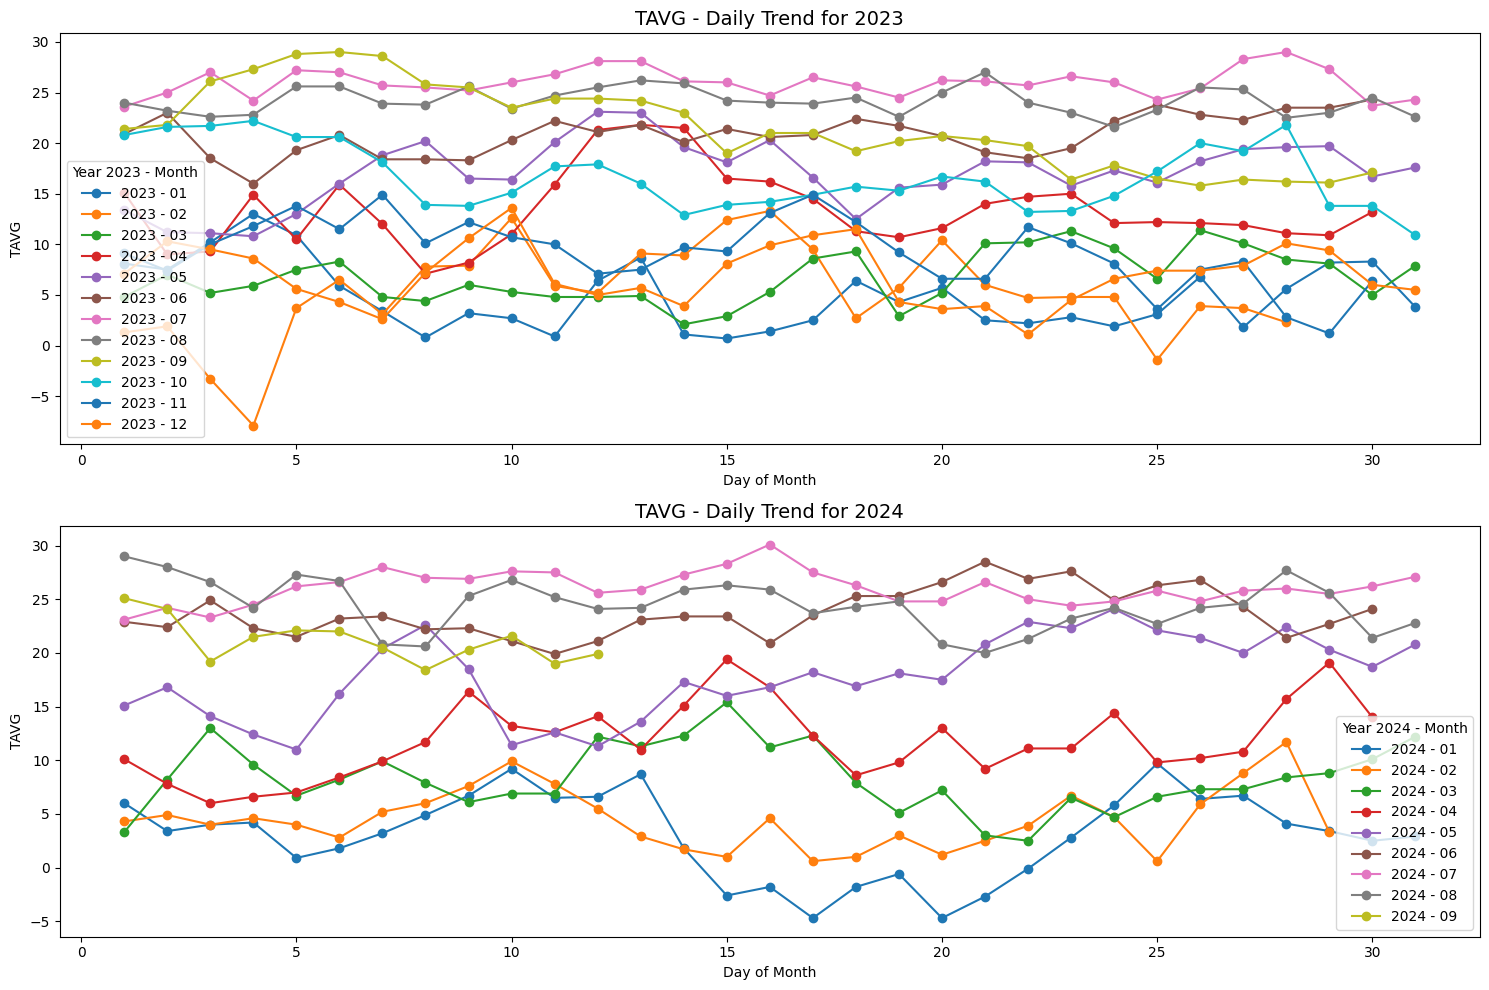

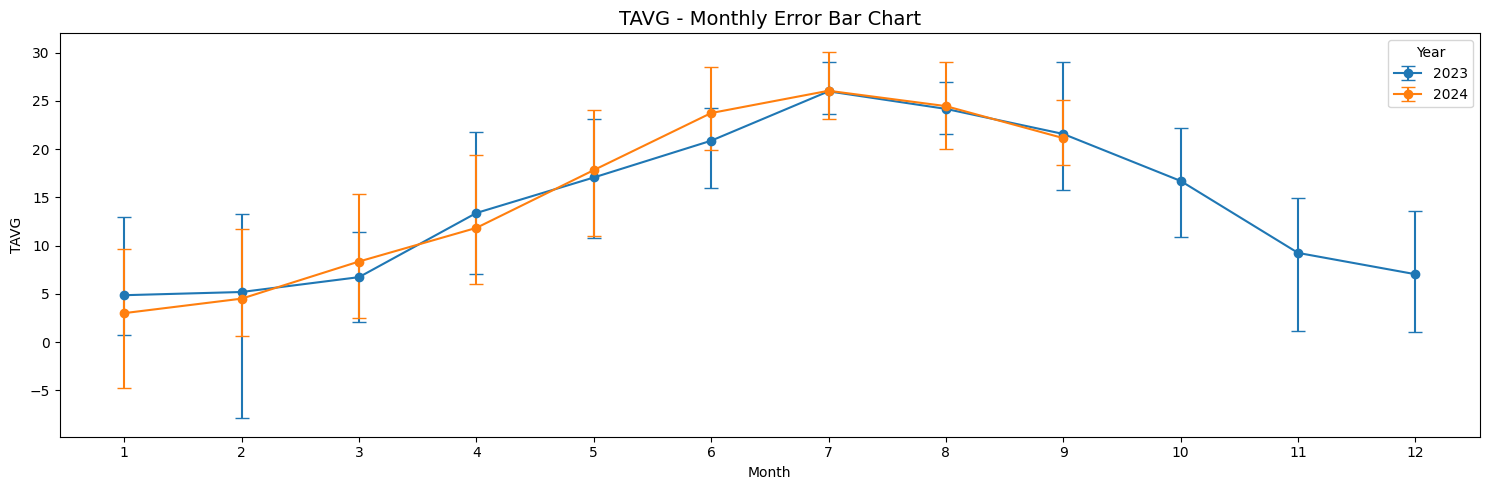

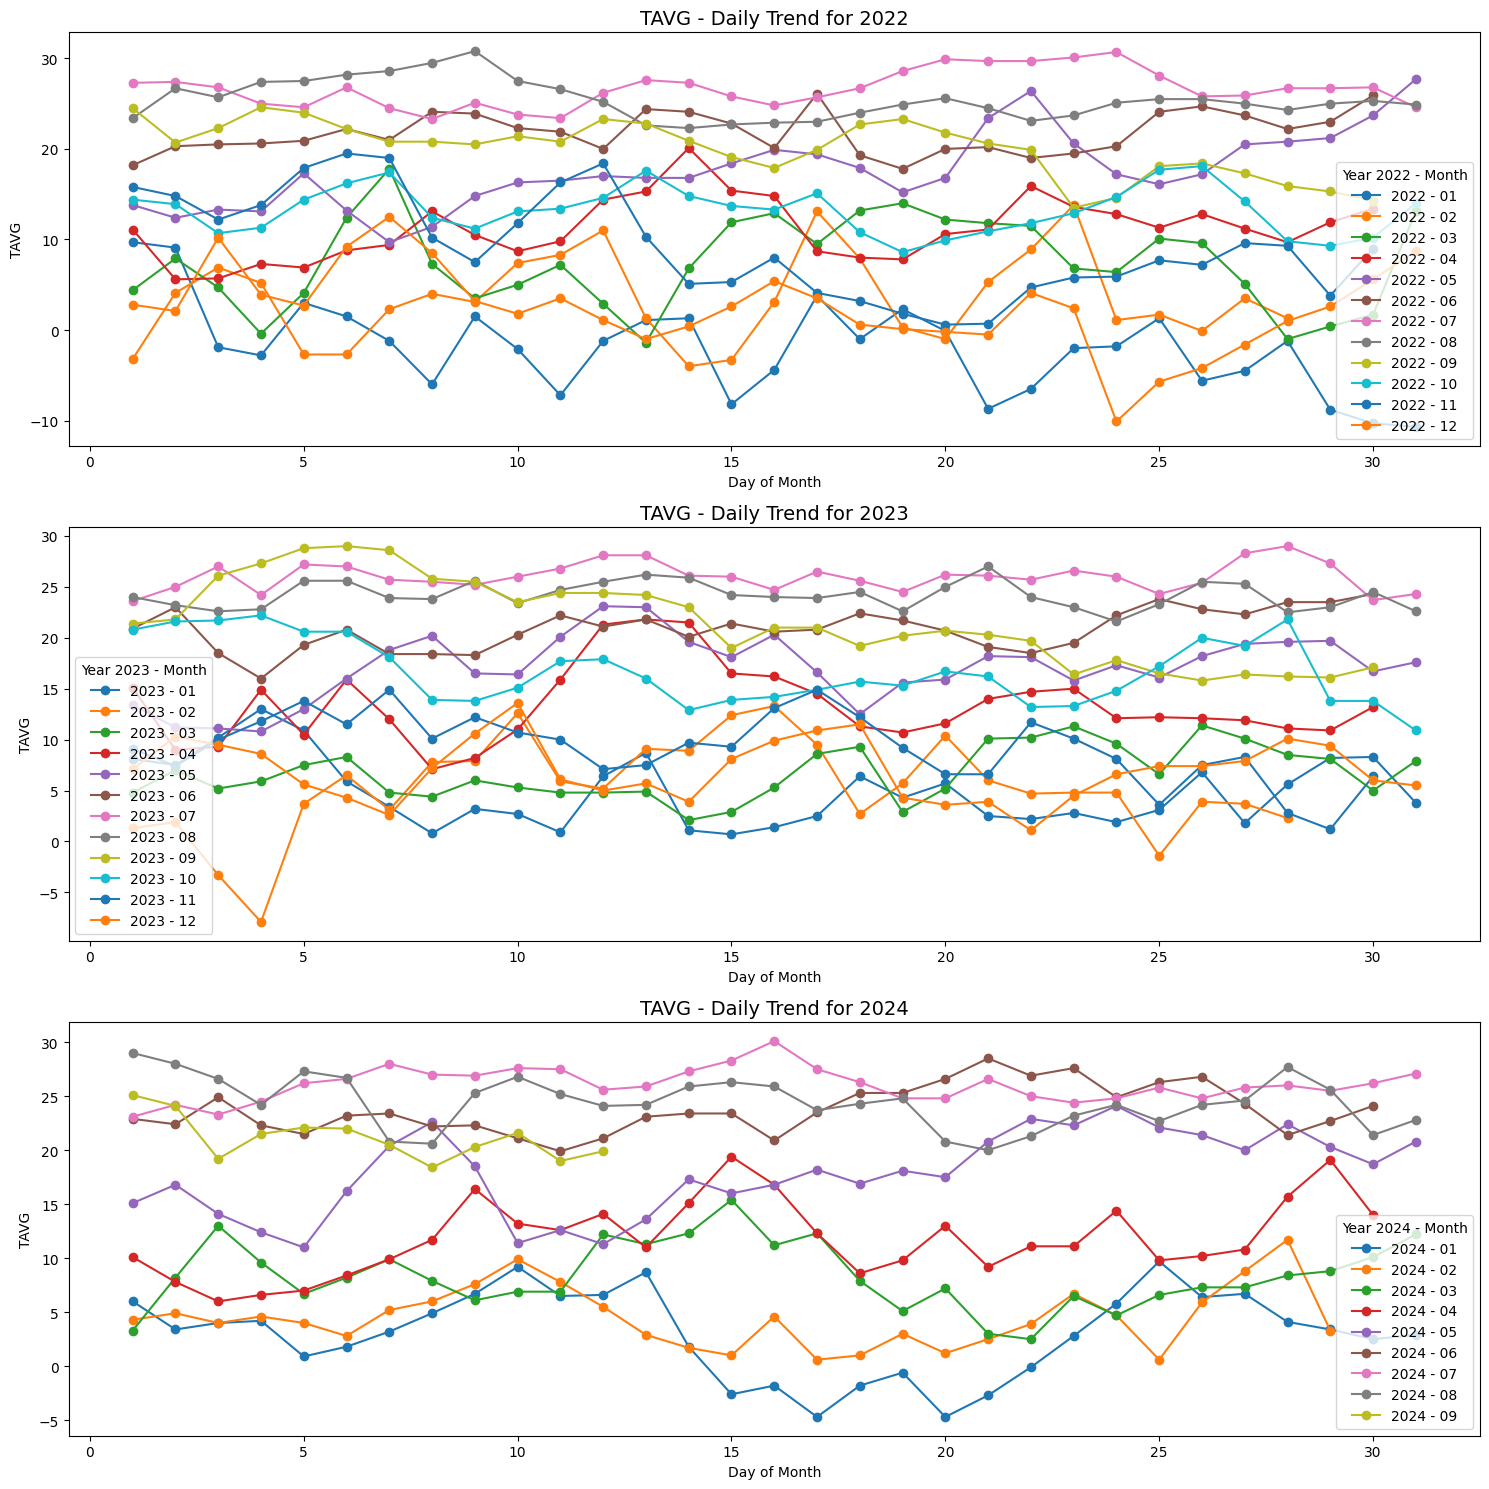

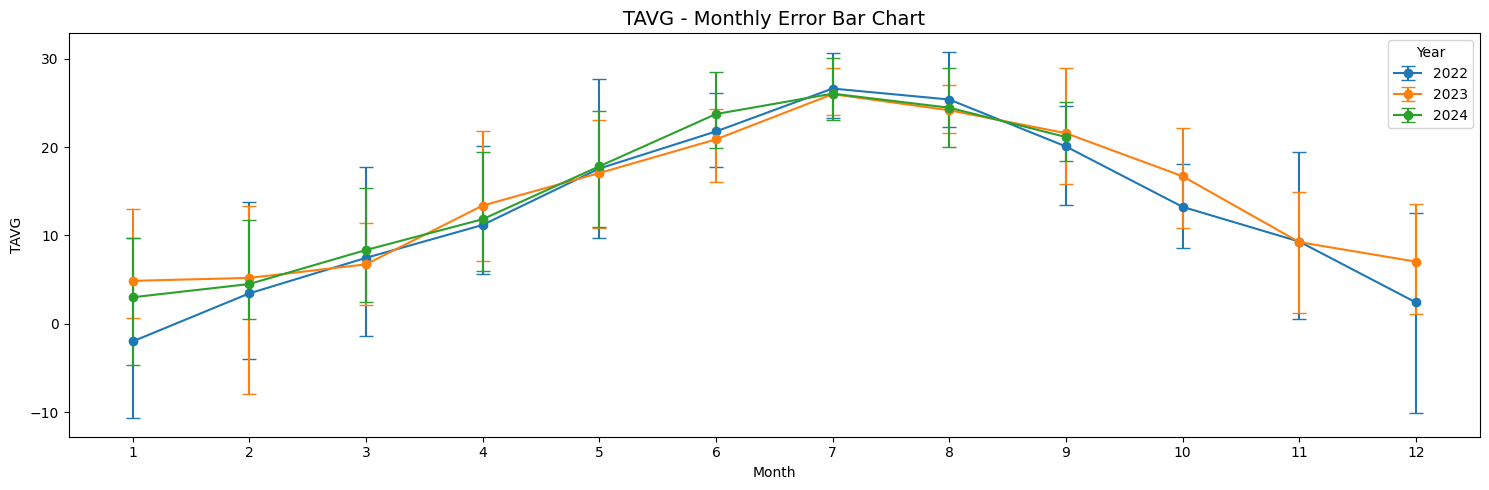

In [79]:
#@title version 2

import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display

# Function to get weather data for a specific location and time range
def get_weather_data(location, start, end):
    data = Daily(location, start, end)
    data = data.fetch()
    return data

# Example: New York City (latitude, longitude, elevation)
location = Point(40.7128, -74.0060, 10)

# Default time period
start = datetime(2020, 1, 1)
end = datetime.now()

# Fetch weather data for the full range
weather_data = get_weather_data(location, start, end)

# Filter columns for the variables we are interested in
weather_data = weather_data[['tavg', 'prcp', 'wspd', 'pres']].dropna()

# Add a column for the month, year, and day
weather_data['month'] = weather_data.index.month
weather_data['year'] = weather_data.index.year
weather_data['day'] = weather_data.index.day

# List of months for visualization (1 = Jan, 2 = Feb, ..., 12 = Dec)
months = list(range(1, 13))

# Get unique years available in the dataset
years_available = weather_data['year'].unique()

# Create widgets for selecting the variable and years
variable_selector = widgets.Dropdown(
    options=['tavg', 'prcp', 'wspd', 'pres'],
    value='tavg',
    description='Variable:',
)

year_selector = widgets.SelectMultiple(
    options=years_available,
    value=(years_available[0],),
    description='Years:',
)

# Create a button to run the analysis
run_button = widgets.Button(description="Run")

# Function to create separate daily trend charts for each year and combined error bar chart
def create_charts(variable, years):
    num_years = len(years)

    # Create a figure with a grid of subplots for the daily trend, 4 columns
    fig, axs = plt.subplots(num_years, 1, figsize=(15, 5 * num_years))

    # If there's only one year, make axs iterable by wrapping it in a list
    if num_years == 1:
        axs = [axs]

    # Plot the daily trend chart for each year
    for i, year in enumerate(years):
        for month in months:
            daily_data = weather_data[(weather_data['year'] == year) & (weather_data['month'] == month)]
            if not daily_data.empty:
                axs[i].plot(daily_data['day'], daily_data[variable], marker='o', label=f'{year} - {month:02d}')

        axs[i].set_title(f'{variable.upper()} - Daily Trend for {year}', fontsize=14)
        axs[i].set_xlabel('Day of Month')
        axs[i].set_ylabel(variable.upper())
        axs[i].legend(title=f"Year {year} - Month")

    plt.tight_layout()
    plt.show()

    # Plot the combined monthly error bar chart
    fig, ax = plt.subplots(figsize=(15, 5))
    for year in years:
        monthly_data = weather_data[weather_data['year'] == year].groupby('month')[variable]
        monthly_means = monthly_data.mean().reindex(months)
        monthly_mins = monthly_data.min().reindex(months)
        monthly_maxs = monthly_data.max().reindex(months)

        ax.errorbar(months, monthly_means, yerr=[monthly_means - monthly_mins, monthly_maxs - monthly_means],
                    fmt='o-', capsize=5, label=f'{year}')

    ax.set_title(f'{variable.upper()} - Monthly Error Bar Chart', fontsize=14)
    ax.set_xlabel('Month')
    ax.set_ylabel(variable.upper())
    ax.set_xticks(months)
    ax.legend(title="Year")

    plt.tight_layout()
    plt.show()

# Function to handle the run button click event
def on_run_button_clicked(b):
    selected_years = list(year_selector.value)
    selected_variable = variable_selector.value
    create_charts(selected_variable, selected_years)

# Connect the button to the event handler
run_button.on_click(on_run_button_clicked)

# Display the widgets and run button
display(variable_selector, year_selector, run_button)




In [84]:
#@title version 3
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display, clear_output

# Predefined coordinates for major cities
city_coordinates = {
    'New York, USA': Point(40.7128, -74.0060, 10),
    'Los Angeles, USA': Point(34.0522, -118.2437, 10),
    'Toronto, Canada': Point(43.651070, -79.347015, 10),
    'Mexico City, Mexico': Point(19.4326, -99.1332, 10),
    'London, UK': Point(51.5074, -0.1278, 10),
    'Paris, France': Point(48.8566, 2.3522, 10),
    'Berlin, Germany': Point(52.5200, 13.4050, 10),
    'Rome, Italy': Point(41.9028, 12.4964, 10),
    'Tokyo, Japan': Point(35.6762, 139.6503, 10),
    'Beijing, China': Point(39.9042, 116.4074, 10),
    'Mumbai, India': Point(19.0760, 72.8777, 10),
    'Seoul, South Korea': Point(37.5665, 126.9780, 10),
    'São Paulo, Brazil': Point(-23.5505, -46.6333, 10),
    'Buenos Aires, Argentina': Point(-34.6037, -58.3816, 10),
    'Santiago, Chile': Point(-33.4489, -70.6693, 10),
    'Bogotá, Colombia': Point(4.7110, -74.0721, 10),
    'Cairo, Egypt': Point(30.0444, 31.2357, 10),
    'Johannesburg, South Africa': Point(-26.2041, 28.0473, 10),
    'Nairobi, Kenya': Point(-1.2921, 36.8219, 10),
    'Lagos, Nigeria': Point(6.5244, 3.3792, 10),
    'Sydney, Australia': Point(-33.8688, 151.2093, 10),
    'Melbourne, Australia': Point(-37.8136, 144.9631, 10),
}

# Function to get weather data for a specific location and time range
def get_weather_data(location, start, end):
    data = Daily(location, start, end)
    data = data.fetch()
    return data

# Default time period
start = datetime(2020, 1, 1)
end = datetime.now()

# Create widgets for selecting the city, variable, and years
city_selector = widgets.Dropdown(
    options=list(city_coordinates.keys()),
    value='New York, USA',  # Default city
    description='City:',
)

variable_selector = widgets.Dropdown(
    options=['tavg', 'prcp', 'wspd', 'pres'],
    value='tavg',
    description='Variable:',
)

year_selector = widgets.SelectMultiple(
    options=[2020, 2021, 2022, 2023, 2024],
    value=(2020,),
    description='Years:',
)

# Create buttons to run the analysis and clear the output
run_button = widgets.Button(description="Run")
clear_button = widgets.Button(description="Clear Output")

# Output area to display the results
output_area = widgets.Output()

# Function to create daily trend charts for each year and the monthly error bar chart
def create_charts(variable, years, city_name):
    # Get coordinates for the selected city
    location = city_coordinates[city_name]

    # Fetch weather data for the selected city
    weather_data = get_weather_data(location, start, end)

    # Filter the relevant columns
    weather_data = weather_data[['tavg', 'prcp', 'wspd', 'pres']].dropna()
    weather_data['month'] = weather_data.index.month
    weather_data['year'] = weather_data.index.year
    weather_data['day'] = weather_data.index.day

    # List of months for visualization (1 = Jan, 2 = Feb, ..., 12 = Dec)
    months = list(range(1, 13))

    # Create daily trend charts (one for each year)
    num_years = len(years)
    fig, axs = plt.subplots(num_years, 1, figsize=(15, 5 * num_years))

    # If there's only one year, make axs iterable by wrapping it in a list
    if num_years == 1:
        axs = [axs]

    # Plot the daily trend chart for each year
    for i, year in enumerate(years):
        for month in months:
            daily_data = weather_data[(weather_data['year'] == year) & (weather_data['month'] == month)]
            if not daily_data.empty:
                axs[i].plot(daily_data['day'], daily_data[variable], marker='o', label=f'{year} - {month:02d}')

        axs[i].set_title(f'{variable.upper()} - Daily Trend for {year} ({city_name})', fontsize=14)
        axs[i].set_xlabel('Day of Month')
        axs[i].set_ylabel(variable.upper())
        axs[i].legend(title=f"Year {year} - Month")

    plt.tight_layout()
    plt.show()

    # Plot the combined monthly error bar chart
    fig, ax = plt.subplots(figsize=(15, 5))
    for year in years:
        monthly_data = weather_data[weather_data['year'] == year].groupby('month')[variable]
        monthly_means = monthly_data.mean().reindex(months)
        monthly_mins = monthly_data.min().reindex(months)
        monthly_maxs = monthly_data.max().reindex(months)

        ax.errorbar(months, monthly_means, yerr=[monthly_means - monthly_mins, monthly_maxs - monthly_means],
                    fmt='o-', capsize=5, label=f'{year}')

    ax.set_title(f'{variable.upper()} - Monthly Error Bar Chart ({city_name})', fontsize=14)
    ax.set_xlabel('Month')
    ax.set_ylabel(variable.upper())
    ax.set_xticks(months)
    ax.legend(title="Year")

    plt.tight_layout()
    plt.show()

# Function to handle the run button click event
def on_run_button_clicked(b):
    selected_years = list(year_selector.value)
    selected_variable = variable_selector.value
    selected_city = city_selector.value
    with output_area:
        clear_output()  # Clear the previous output
        create_charts(selected_variable, selected_years, selected_city)

# Function to clear the output area
def on_clear_button_clicked(b):
    with output_area:
        clear_output()

# Connect the buttons to the event handlers
run_button.on_click(on_run_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Display the widgets and run/clear buttons
display(city_selector, variable_selector, year_selector, run_button, clear_button, output_area)


Dropdown(description='City:', options=('New York, USA', 'Los Angeles, USA', 'Toronto, Canada', 'Mexico City, M…

Dropdown(description='Variable:', options=('tavg', 'prcp', 'wspd', 'pres'), value='tavg')

SelectMultiple(description='Years:', index=(0,), options=(2020, 2021, 2022, 2023, 2024), value=(2020,))

Button(description='Run', style=ButtonStyle())

Button(description='Clear Output', style=ButtonStyle())

Output()